Imports

In [1]:
import backtrader as bt
from datetime import datetime
import yfinance as yf
import pickle
import matplotlib
from strategies import Keltner, LogReg, DeepQ

Cerebro Instance

In [2]:
cerebro = bt.Cerebro()

Market Data

In [3]:
"GC=F" # Gold
"^GSPC" # S&P500

data = yf.download("GC=F", interval="1m") #must match name of agent

feed = bt.feeds.PandasDirectData(dataname = data)

cerebro.adddata(feed)

data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-01-20 14:45:00-05:00,3954.909912,3954.919922,3954.379883,3954.379883,3954.379883,0
2023-01-20 14:46:00-05:00,3954.370117,3954.600098,3953.169922,3953.169922,3953.169922,3794000
2023-01-20 14:47:00-05:00,3953.159912,3953.659912,3953.020020,3953.610107,3953.610107,3611000
2023-01-20 14:48:00-05:00,3953.620117,3954.409912,3952.229980,3952.330078,3952.330078,4116000
2023-01-20 14:49:00-05:00,3952.340088,3952.780029,3952.199951,3952.780029,3952.780029,3380000


In [4]:
data.shape[1]

6

Portfolio Balance

In [5]:
init_balance = 4189.71

cerebro.broker.setcash(init_balance)

Loading Strategy

In [6]:
cerebro.addstrategy(DeepQ)

sizer = bt.sizers.PercentSizer

cerebro.addsizer(sizer)

Running Strategy

In [7]:
try:
  for i in range(1): # number of episodes
    cerebro.run()
except KeyboardInterrupt:
  pass

Results

Final Portfolio Value: £4091.924261933654
P/L: £-97.78573806634586


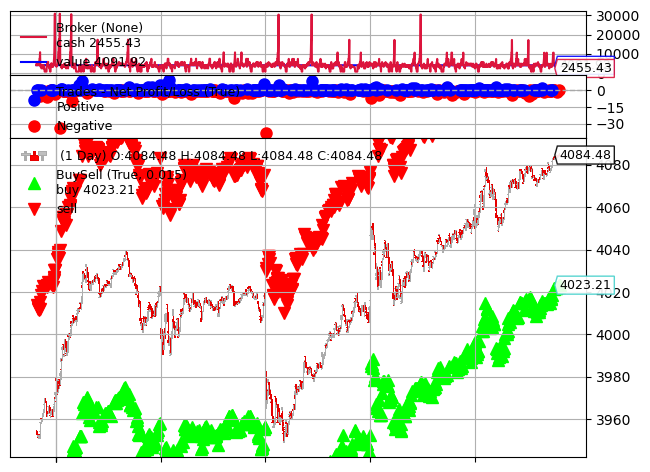

In [10]:
portvalue = cerebro.broker.getvalue()
pnl = portvalue - init_balance

print(f'Final Portfolio Value: £{portvalue}')
print(f'P/L: £{pnl}')

%matplotlib inline

cerebro.plot(iplot=False, style="candlestick", volume = False, filename='plot.png' )

matplotlib.pyplot.show()
